<a href="https://colab.research.google.com/github/caltunay/kaggle_diamond_price_prediction/blob/master/98%25%20accuracy%20-%20Kaggle_Diamonds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
path = '/content/drive/My Drive/Colab Notebooks/Kaggle - Diamonds/diamonds.csv'

df = pd.read_csv(path)
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75



**carat** Carat weight of the diamond

**cut** Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal

**color** Color of the diamond, with D being the best and J the worst

**clarity** How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

**depth** depth % :The height of a diamond, measured from the culet to the table, divided by its average girdle diameter

**table** table%: The width of the diamond's table expressed as a percentage of its average diameter

**price** the price of the diamond

**x** length mm

**y** width mm

**z** depth mm

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [0]:
df.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)

In [0]:
cat_cols = df.select_dtypes('object').columns.values.tolist()
numerik_cols = df.select_dtypes('number').columns.values.tolist()

In [0]:
for col in cat_cols:
    print(df[col].nunique())

5
7
8


In [0]:
for col in cat_cols:
    print(df[col].value_counts(normalize = True))

Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: cut, dtype: float64
G    0.209344
E    0.181628
F    0.176900
H    0.153949
D    0.125603
I    0.100519
J    0.052058
Name: color, dtype: float64
SI1     0.242214
VS2     0.227253
SI2     0.170449
VS1     0.151483
VVS2    0.093919
VVS1    0.067760
IF      0.033185
I1      0.013737
Name: clarity, dtype: float64


In [0]:
df = pd.get_dummies(data = df, prefix_sep = '|', columns = cat_cols, drop_first = False)

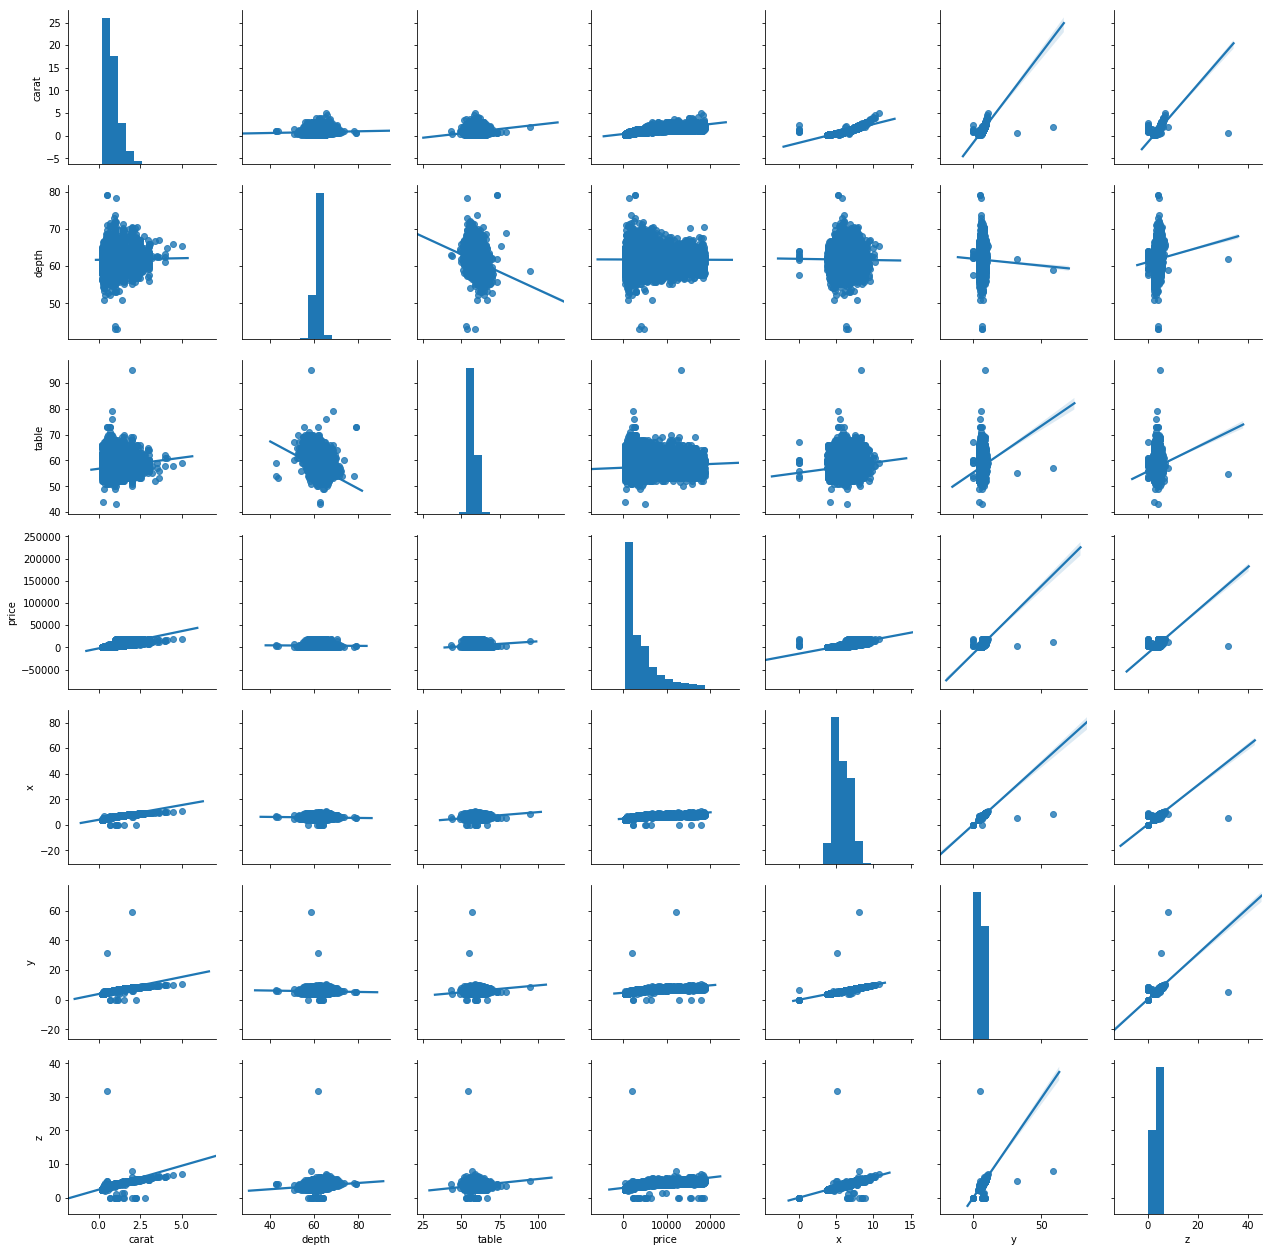

In [0]:
sns.pairplot(df[numerik_cols], kind = 'reg')

In [0]:
len(df.columns)

27

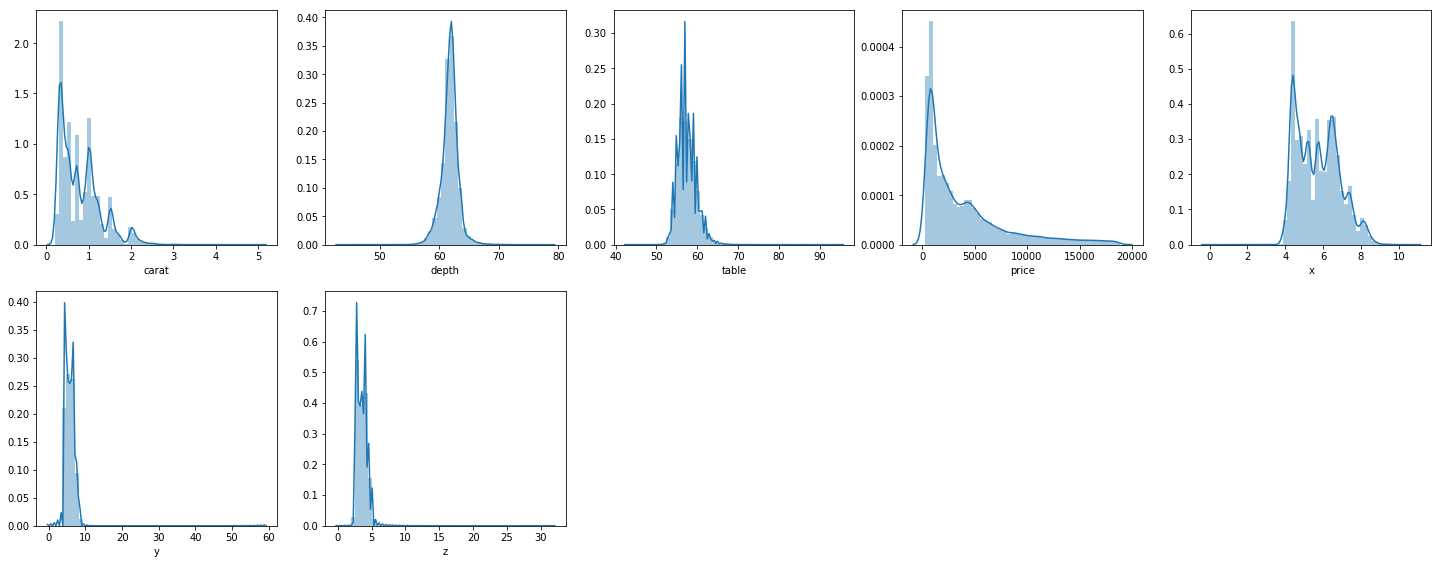

In [0]:
plt.figure(figsize = (25,25))
n=1

for i in df[numerik_cols].columns.values.tolist():
    
    plt.subplot(5,5,n)
    sns.distplot(df[i])
    n+=1

In [0]:
for i in numerik_cols:
    print(i," ",df[i].skew())

carat   1.116645920812613
depth   -0.08229402630189467
table   0.7968958486695427
price   1.618395283383529
x   0.3786763426463927
y   2.4341667164885554
z   1.5224225590685583


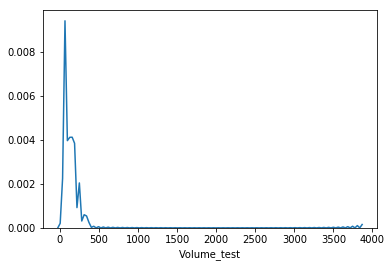

In [0]:
df['Volume_test'] = (df['x'] * df['y'] * df['z'])

sns.distplot(df['Volume_test'], hist = False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


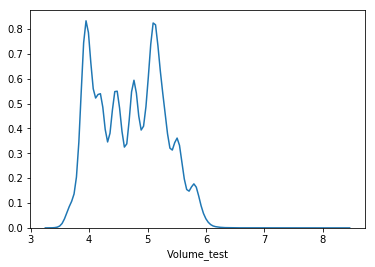

In [0]:
df['Volume_test'] = np.log(df['Volume_test'])

sns.distplot(df['Volume_test'], hist = False)

In [0]:
df = df.drop(labels = 'x y z'.split(), axis = 1)

In [0]:
df.head()

,carat,depth,table,price,cut|Fair,cut|Good,cut|Ideal,cut|Premium,cut|Very Good,color|D,color|E,color|F,color|G,color|H,color|I,color|J,clarity|I1,clarity|IF,clarity|SI1,clarity|SI2,clarity|VS1,clarity|VS2,clarity|VVS1,clarity|VVS2,Volume_test
0,0.23,61.5,55.0,326,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3.642889
1,0.21,59.8,61.0,326,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,3.541129
2,0.23,56.9,65.0,327,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,3.639607
3,0.29,62.4,58.0,334,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,3.844270
4,0.31,63.3,58.0,335,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3.949651


skew 1.618395283383529


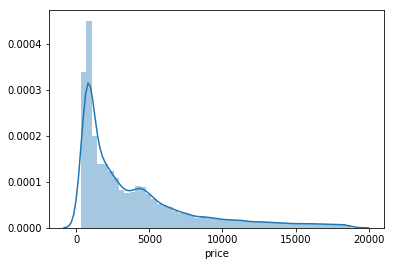

In [0]:
print('skew', df.price.skew())
sns.distplot(df.price);

In [0]:
df['price'] = np.log(df['price'])

In [0]:
df.drop(labels = 'price2', axis = 1, inplace = True)

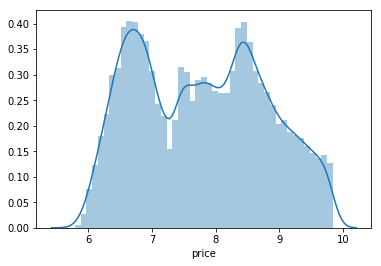

In [0]:
sns.distplot(df.price)

In [0]:
df.rename({'Volume_test':'Volume'}, axis = 1, inplace = True)

In [0]:
df.nunique().sort_values(ascending = False)

Volume           28415
price            11602
carat              273
depth              184
table              127
clarity|VS2          2
clarity|VS1          2
clarity|VVS1         2
cut|Fair             2
cut|Good             2
cut|Ideal            2
cut|Premium          2
cut|Very Good        2
color|D              2
color|E              2
color|F              2
clarity|VVS2         2
color|H              2
color|I              2
color|J              2
clarity|I1           2
clarity|IF           2
clarity|SI1          2
clarity|SI2          2
color|G              2
dtype: int64

In [0]:
numerik_cols = ['carat', 'depth', 'table']

for i in numerik_cols:
    print(i,"",df[i].skew())

carat  1.116645920812613
depth  -0.08229402630189467
table  0.7968958486695427


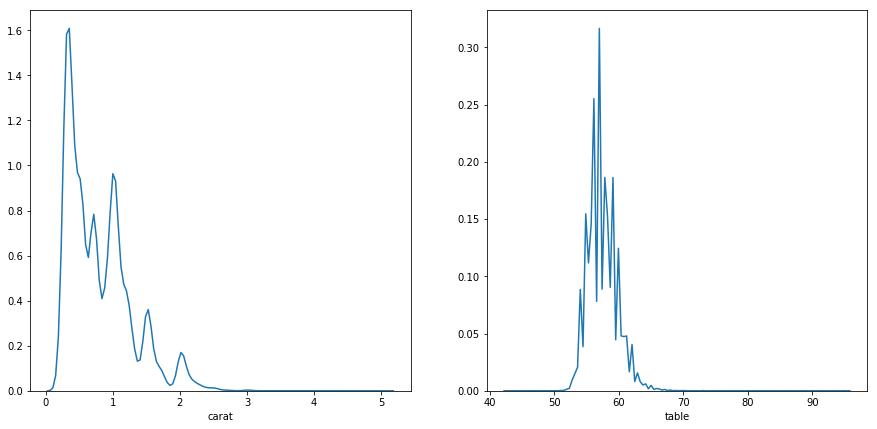

In [0]:
plt.figure(figsize = (15,7))
n=1
for i in 'carat table'.split():
    plt.subplot(1,2,n)
    sns.distplot(df[i], hist = False)
    n+=1

In [0]:
for i in 'carat table'.split():
    df[i] = np.log(df[i])
    

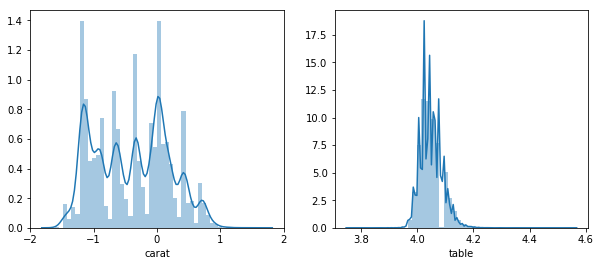

In [0]:
n=1
plt.figure(figsize = (10,4))
for i in 'carat table'.split():
    plt.subplot(1,2,n)
    sns.distplot(df[i])
    n+=1

In [0]:
df.head()

,carat,depth,table,price,cut|Fair,cut|Good,cut|Ideal,cut|Premium,cut|Very Good,color|D,color|E,color|F,color|G,color|H,color|I,color|J,clarity|I1,clarity|IF,clarity|SI1,clarity|SI2,clarity|VS1,clarity|VS2,clarity|VVS1,clarity|VVS2,Volume
0,-1.469676,61.5,4.007333,5.786897,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,3.642889
1,-1.560648,59.8,4.110874,5.786897,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,3.541129
2,-1.469676,56.9,4.174387,5.789960,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,3.639607
3,-1.237874,62.4,4.060443,5.811141,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,3.844270
4,-1.171183,63.3,4.060443,5.814131,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3.949651


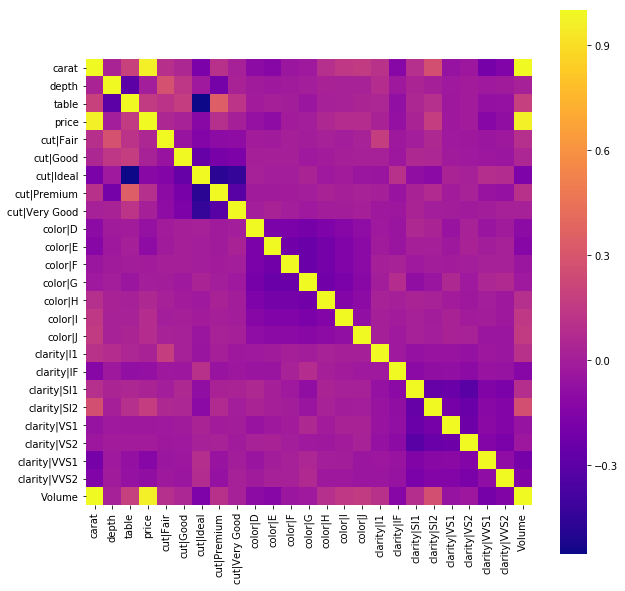

In [0]:
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), cmap = 'plasma', square = True)

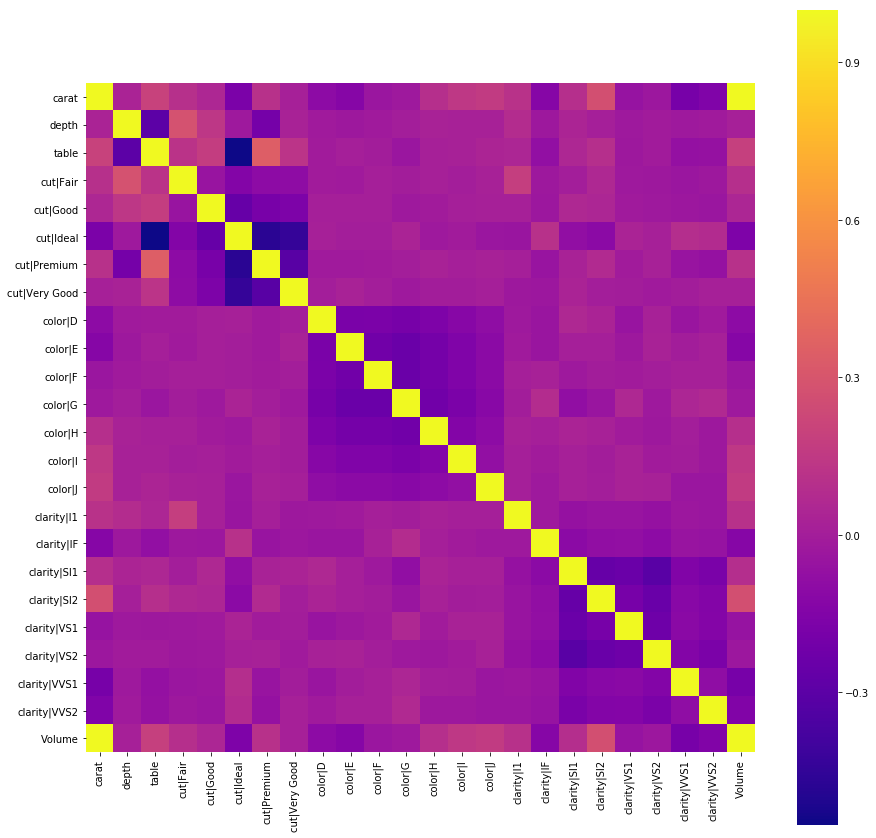

In [0]:
plt.figure(figsize = (15,15))
sns.heatmap(df.drop(labels = 'price', axis = 1).corr(), cmap = 'plasma', square = True);

In [0]:
df.drop(labels = 'Volume', axis = 1, inplace = True)

In [0]:
tl = [col for col in df.columns.values.tolist() if '|' in col]

In [0]:
len(tl)

20

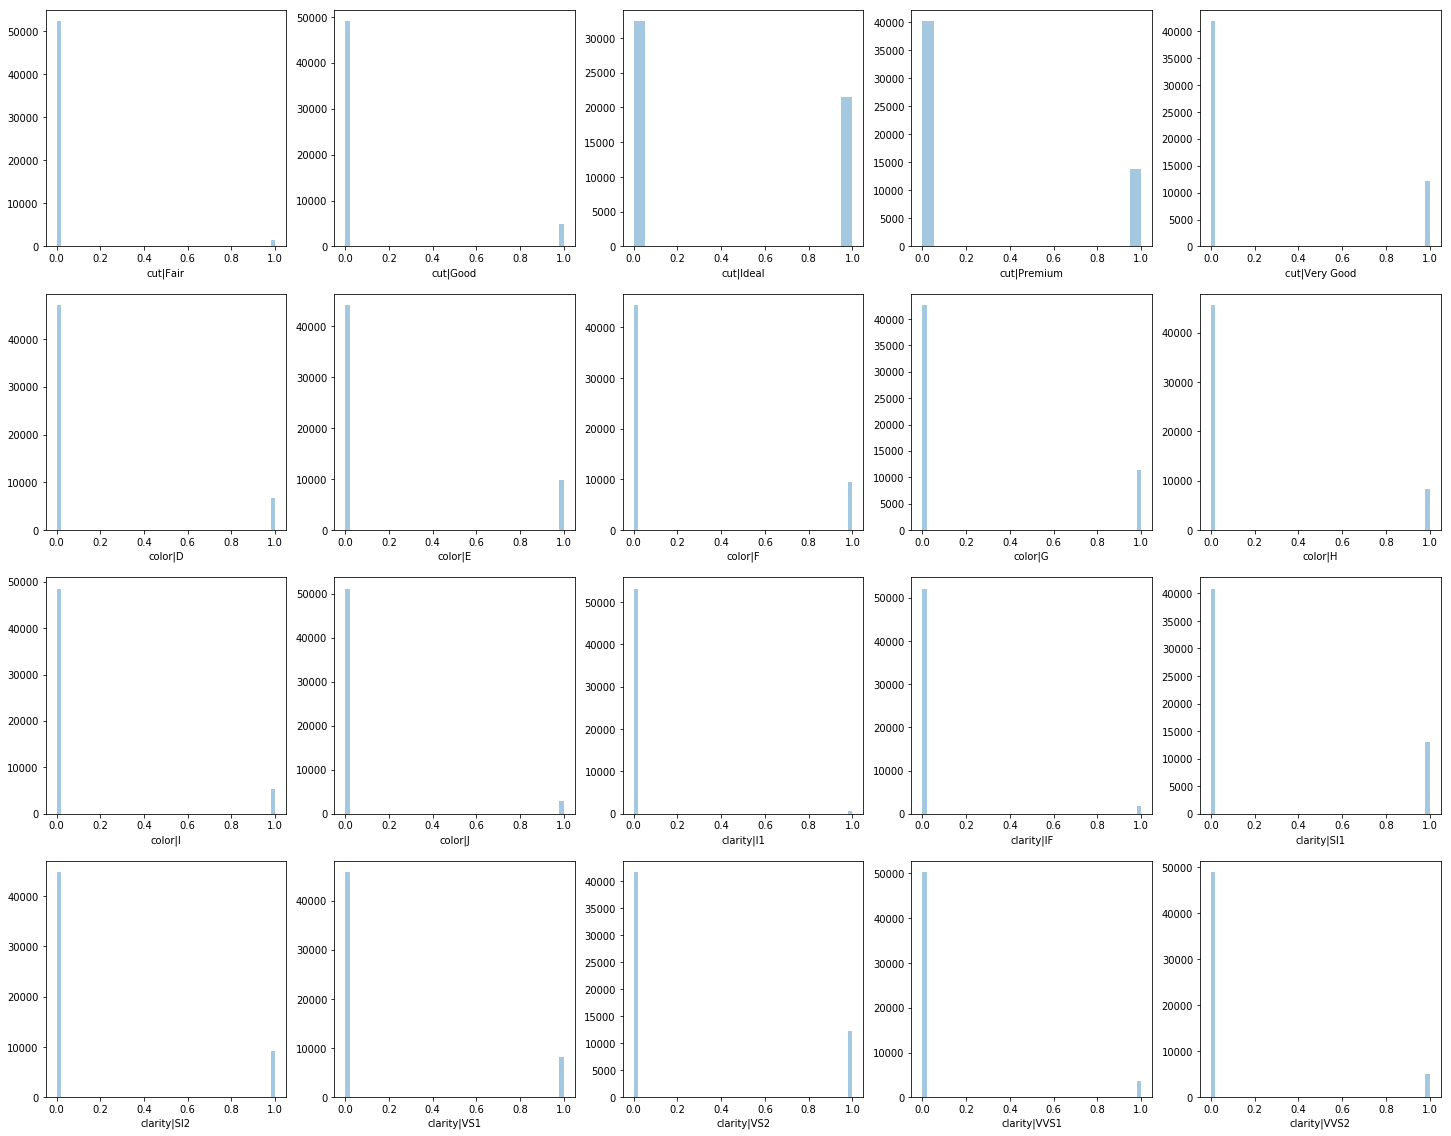

In [0]:
n = 1
plt.figure(figsize = (25,20))

for i in tl:
    
    plt.subplot(4,5,n)
    
    sns.distplot(df[i], kde = False)
    n += 1
    

In [0]:
pd.concat([pd.DataFrame(df['clarity|VVS2'].value_counts()).T,pd.DataFrame(df['cut|Ideal'].value_counts()).T], axis = 0)

# pd.DataFrame(df['clarity|VVS2'].value_counts()).T
# pd.DataFrame(df['cut|Ideal'].value_counts()).T

,0,1
clarity|VVS2,48874,5066
cut|Ideal,32389,21551


In [0]:
pd.DataFrame(df['cut|Ideal'].value_counts(normalize = True)).T

,0,1
cut|Ideal,0.600463,0.399537


In [0]:
tl

['cut|Fair',
 'cut|Good',
 'cut|Ideal',
 'cut|Premium',
 'cut|Very Good',
 'color|D',
 'color|E',
 'color|F',
 'color|G',
 'color|H',
 'color|I',
 'color|J',
 'clarity|I1',
 'clarity|IF',
 'clarity|SI1',
 'clarity|SI2',
 'clarity|VS1',
 'clarity|VS2',
 'clarity|VVS1',
 'clarity|VVS2']

In [0]:
temp_df = pd.DataFrame()

for col in tl:
#     print(col)
#     print(df[col].value_counts(normalize = True))
    temp_row = pd.DataFrame(df[col].value_counts(normalize = True)).T
    temp_df = pd.concat([temp_df, temp_row], axis = 0)
    

In [0]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, cut|Fair to clarity|VVS2
Data columns (total 2 columns):
0    20 non-null float64
1    20 non-null float64
dtypes: float64(2)
memory usage: 480.0+ bytes


In [0]:
# df['var3'] = pd.Series(["{0:.2f}%".format(val * 100) for val in df['var3']], index = df.index)

temp_df[0] = pd.Series(['{0:.2f}%'.format(i * 100) for i in temp_df[0]], index = temp_df.index)

In [0]:
temp_df[1] = pd.Series(['{0:.2f}%'.format(x * 100) for x in temp_df[1]], index = temp_df.index)

In [0]:
temp_df.sort_values(by = 0, ascending = False)

In [0]:
df.columns.values.tolist()

In [0]:
# Training 

from sklearn.model_selection import train_test_split as tts, GridSearchCV
from sklearn import linear_model
import statsmodels.formula.api as smf 
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
import statsmodels.api as sm

In [0]:
x = df.drop(labels = 'price', axis = 1).values
y = df['price'].values

x_train, x_test, y_train, y_test = tts(x, y, random_state = 42, test_size = .276)

print(x_train.shape, x_test.shape, "\n", y_train.shape, y_test.shape)

(39052, 23) (14888, 23) 
 (39052,) (14888,)


In [0]:
ols_cols = list(range(0, len(df.columns)))
ols_cols

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [0]:
x_ols = df.drop(labels = 'price', axis = 1).values
y_ols = df['price'].values

ssx = StandardScaler()
x_ols = ssx.fit_transform(x_ols)

ones = np.ones((len(df), 1)).astype(int)
x_ols = np.append(arr = ones, values = x_ols, axis = 1)

In [0]:
x_ols_opt = x_ols[:,ols_cols]

reg_ols = sm.OLS(endog = y_ols, exog = x_ols_opt).fit()
print(reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.524e+05
Date:                Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                        06:38:09   Log-Likelihood:                 31968.
No. Observations:               53940   AIC:                        -6.389e+04
Df Residuals:                   53919   BIC:                        -6.371e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7868      0.001   1.35e+04      0.0

In [0]:
ols_cols.pop(3)
x_ols_opt = x_ols[:,ols_cols]

reg_ols = sm.OLS(endog = y_ols, exog = x_ols_opt).fit()
print(reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.604e+05
Date:                Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                        06:38:20   Log-Likelihood:                 31968.
No. Observations:               53940   AIC:                        -6.390e+04
Df Residuals:                   53920   BIC:                        -6.372e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7868      0.001   1.35e+04      0.0

In [0]:
ols_cols.pop(2)
x_ols_opt = x_ols[:,ols_cols]

reg_ols = sm.OLS(endog = y_ols, exog = x_ols_opt).fit()
print(reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.685e+05
Date:                Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                        06:38:47   Log-Likelihood:                 31835.
No. Observations:               53940   AIC:                        -6.363e+04
Df Residuals:                   53921   BIC:                        -6.346e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7868      0.001   1.35e+04      0.0

In [0]:
ols_cols.pop(2)
x_ols_opt = x_ols[:,ols_cols]

reg_ols = sm.OLS(endog = y_ols, exog = x_ols_opt).fit()
print(reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.657e+05
Date:                Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                        06:39:04   Log-Likelihood:                 31396.
No. Observations:               53940   AIC:                        -6.275e+04
Df Residuals:                   53921   BIC:                        -6.258e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7868      0.001   1.34e+04      0.0

In [0]:
ols_cols.pop(6)
x_ols_opt = x_ols[:,ols_cols]

reg_ols = sm.OLS(endog = y_ols, exog = x_ols_opt).fit()
print(reg_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                 1.693e+05
Date:                Fri, 16 Aug 2019   Prob (F-statistic):               0.00
Time:                        06:39:21   Log-Likelihood:                 31967.
No. Observations:               53940   AIC:                        -6.390e+04
Df Residuals:                   53921   BIC:                        -6.373e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7868      0.001   1.35e+04      0.0

In [0]:
# ols_cols
x_opt = x_ols[:,ols_cols]

x_opt_train, x_opt_test, y_ols_train, y_ols_test = tts(x_opt, y_ols, test_size = .29, random_state = 42)

lm = linear_model.LinearRegression()
lm.fit(x_opt_train,y_ols_train)
lm_ypred = lm.predict(x_opt_test)

In [0]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score

In [0]:
print('Mean Absolute Error: ',mae(y_ols_test, lm_ypred),'\n',
      'Mean Squared Error: ',mse(y_ols_test, lm_ypred),'\n',
      'Accuracy: ', r2_score(y_ols_test, lm_ypred))


Mean Absolute Error:  0.1046136201748532 
 Mean Squared Error:  0.01831549885912493 
 Accuracy:  0.9820845033826052


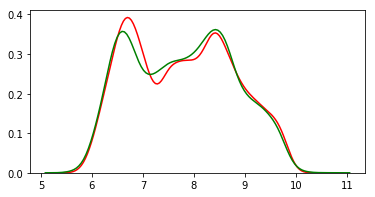

In [0]:
plt.figure(figsize = (6,3))
ax = sns.distplot(y_ols_test, color = 'red', hist = False)
sns.distplot(lm_ypred, color = 'green', hist = False);

In [0]:
df = pd.concat([df,pd.DataFrame(y, columns = ['price'])], axis =1)

In [0]:
ssx2 = StandardScaler()

to_scale = 'carat depth table'.split()

scaled_df = pd.DataFrame(ssx2.fit_transform(df[to_scale]),columns = to_scale)
remaining_df = df.drop(labels = to_scale, axis = 1)

df_clean = pd.concat([scaled_df, remaining_df], axis = 1)
df_clean.head()

,carat,depth,table,cut|Fair,cut|Good,cut|Ideal,cut|Premium,cut|Very Good,color|D,color|E,color|F,color|G,color|H,color|I,color|J,clarity|I1,clarity|IF,clarity|SI1,clarity|SI2,clarity|VS1,clarity|VS2,clarity|VVS1,clarity|VVS2,price
0,-1.837668,-0.174092,-1.118577,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,5.786897
1,-1.993223,-1.360738,1.577162,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,5.786897
2,-1.837668,-3.385019,3.230768,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,5.789960
3,-1.441306,0.454133,0.264167,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,5.811141
4,-1.327269,1.082358,0.264167,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,5.814131


In [0]:
x = df_clean.drop(labels = 'price', axis = 1)
y = df_clean['price']

In [0]:
x_train, x_test, y_train, y_test = tts(x, y, random_state = 42, test_size = .3)
print(x_train.shape, x_test.shape,'\n', y_train.shape, y_test.shape)

(37758, 23) (16182, 23) 
 (37758,) (16182,)


In [0]:
lasso_model = linear_model.Lasso()

lasso_model.fit(x_train, y_train)
lasso_ypred = lasso_model.predict(x_test)

In [0]:
print(' Mean Absolute Error: ',mae(y_test,lasso_ypred), '\n',
      'Mean Squared Error: ',mse(y_test,lasso_ypred),'\n',
      'Accuracy: ', r2_score(y_test,lasso_ypred))

 Mean Absolute Error:  0.873126974361294 
 Mean Squared Error:  1.0229933430752285 
 Accuracy:  -0.00016146299808239561


In [0]:
ridge_model = linear_model.Ridge()
ridge_model.fit(x_train, y_train)
ridge_ypred = ridge_model.predict(x_test)

In [0]:
print(' Mean Absolute Error: ', mae(y_test, ridge_ypred),'\n',
     'Mean Squared Error: ', mse(y_test, ridge_ypred),'\n',
     'Accuracy: ', r2_score(y_test, ridge_ypred))

 Mean Absolute Error:  0.10453290914700104 
 Mean Squared Error:  0.01826912977124093 
 Accuracy:  0.9821386134295085


In [0]:
# mean of ridge and linear

# lm_ypred
# ridge_ypred

sml_df = pd.DataFrame(np.exp(lm_ypred), columns = ['Simple Multi Linear'])
ridge_df = pd.DataFrame(np.exp(ridge_ypred), columns = ['Ridge Linear'])

In [0]:
y_test = pd.DataFrame(np.exp(y_test)).reset_index(drop = True)

In [0]:
np.append([lm_ypred, ridge_ypred])

TypeError: ignored